In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
state = 'AL'

In [4]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)

In [5]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [6]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [7]:
symptoms_dataframe_ri.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

In [65]:
symptoms_dataframe_ri

,listingid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,cj_living_area,fips_code,...,immaculate custom,high efficiency,plenty room roam,neighborhood prattville,letson farms,one of a kind home,adjacent lot,luxury vinyl,spacious secondary bedrooms,transaction_year
0,226801671,202011,2020.0,19300,19300,AL,20201130,335000.0,1868.0,01003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
1,226026334,202008,2020.0,13820,13820,AL,20200709,191000.0,1450.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
2,226026939,202008,2020.0,13820,13820,AL,20200710,277000.0,3370.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
3,226937042,202008,2020.0,13820,13820,AL,20200717,555000.0,4478.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
4,226937313,202008,2020.0,33860,33860,AL,20200803,247000.0,2697.0,01101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206270,10185777,200505,2013.0,13820,13820,AL,20050607,132500.0,1942.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
206271,10173838,200508,2013.0,13820,13820,AL,20050715,190500.0,1692.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
206272,10190012,200505,2013.0,13820,13820,AL,20050503,198900.0,1578.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
206273,10202921,200511,2013.0,13820,13820,AL,20051103,124000.0,1526.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0


In [12]:
symptoms_dataframe_ri_new = symptoms_dataframe_ri[symptoms_dataframe_ri.columns[pd.Series(symptoms_dataframe_ri.columns).str.startswith('new')]]

In [14]:
symptoms_dataframe_ri_new.columns

Index(['new stainless steel appliances', 'new carpet', 'new roof', 'new paint',
       'new hot water heater', 'new hvac', 'new cabinets', 'new home',
       'new appliances', 'new ac',
       ...
       'new hvacs', 'new park', 'new community', 'new black appliances',
       'new architectural', 'new privacy', 'new restaurants', 'new designer',
       'new items', 'new full bath'],
      dtype='object', length=130)

In [64]:
symptoms_dataframe_ri_new

,new stainless steel appliances,new carpet,new roof,new paint,new hot water heater,new hvac,new cabinets,new home,new appliances,new ac,...,new park,new community,new black appliances,new architectural,new privacy,new restaurants,new designer,new items,new full bath,sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
symptoms_dataframe_ri_new['sum'] = symptoms_dataframe_ri_new.sum(axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
symptoms_dataframe_ri_new['sum'].max()

14.0

In [42]:
symptoms_dataframe_ri['transaction_year'] = np.floor(np.array((symptoms_dataframe_ri['Transdate'].values/10000)))

In [63]:
for column in symptoms_dataframe_ri_new.columns:
    print('***********')
    print(column)
    
    
    temp_df = symptoms_dataframe_ri_new[(symptoms_dataframe_ri_new[column]==1.) & \
                                        (symptoms_dataframe_ri_new['sum']==1.) & \
                                       (symptoms_dataframe_ri['transaction_year']==2021)]
    print(len(temp_df))
    result_no_area = (symptoms_dataframe_ri.loc[temp_df.index,'avmerror']*\
        symptoms_dataframe_ri.loc[temp_df.index,'Transprice'])
    print('Mean', np.mean(result_no_area))
    print('Median', np.median(result_no_area))
    #print(np.percentile(result_no_area,[25,50,75]))
    result_by_area = (symptoms_dataframe_ri.loc[temp_df.index,'avmerror']*\
        symptoms_dataframe_ri.loc[temp_df.index,'Transprice']/\
        symptoms_dataframe_ri.loc[temp_df.index,'cj_living_area']).values
    print('Mean',np.mean(result_by_area))
    print('Median', np.median(result_by_area))
    #print(np.percentile(result_by_area,[25,50,75]))
    print('')

***********
new stainless steel appliances
392
Mean 24328.76737244898
Median 15348.03000000001
Mean 12.44724551899222
Median 6.720907649552858

***********
new carpet
159
Mean 21317.665471698114
Median 10533.719999999998
Mean 10.205254972292268
Median 5.449532660647879

***********
new roof
269
Mean 21534.763680297398
Median 12844.579999999985
Mean 9.899974201730915
Median 7.489478748997598

***********
new paint
100
Mean 14746.265100000002
Median 14723.460000000008
Mean 8.969342582864046
Median 8.63299911637799

***********
new hot water heater
97
Mean 16638.72082474227
Median 12188.210000000003
Mean 8.974563626202665
Median 7.098774795799296

***********
new hvac
103
Mean 23959.56834951456
Median 13182.580000000002
Mean 11.65759561135779
Median 5.857427445360089

***********
new cabinets
48
Mean 37564.40791666667
Median 24335.91000000001
Mean 22.264239459011407
Median 14.604439376745805

***********
new home
79
Mean 17699.924810126588
Median 9613.239999999998
Mean 10.849514753818795


Median 67283.56999999998
Mean 35.5381483038537
Median 35.5381483038537

***********
new features
3
Mean 200221.2933333333
Median 156137.36999999997
Mean 57.409665750417425
Median 60.145365947611694

***********
new tankless
2
Mean -87654.82499999998
Median -87654.82499999998
Mean -17.16101055119158
Median -17.16101055119158

***********
new crown
0
Mean nan
Median nan
Mean nan
Median nan

***********
new lvp
12
Mean 16129.804166666667
Median 8906.73
Mean 10.286485197707858
Median 5.181041564258013

***********
new tile shower
2
Mean -9006.565000000006
Median -9006.565000000006
Mean -0.9689935067027143
Median -0.9689935067027143

***********
new dimensional roof
0
Mean nan
Median nan
Mean nan
Median nan

***********
new storage
0
Mean nan
Median nan
Mean nan
Median nan

***********
new kitchen counter tops
1
Mean 130.9700000000047
Median 130.9700000000047
Mean 0.09249293785311065
Median 0.09249293785311065

***********
new front porch
0
Mean nan
Median nan
Mean nan
Median nan

*********

In [ ]:
# Q-to-Q before cost (by quarter) 


In [57]:
column = 'new roof'

years = range(2012,2022)
list_price = []

for year in years:
    
    temp_df = symptoms_dataframe_ri_new[(symptoms_dataframe_ri_new[column]==1.) & \
                                        (symptoms_dataframe_ri_new['sum']==1.) & \
                                       (symptoms_dataframe_ri['transaction_year']==year)]
    #print(len(temp_df))
    result_no_area = (symptoms_dataframe_ri.loc[temp_df.index,'avmerror']*\
        symptoms_dataframe_ri.loc[temp_df.index,'Transprice'])
    #print('Mean', np.mean(result_no_area))
    #print('Median', np.median(result_no_area))
    #print(np.percentile(result_no_area,[25,50,75]))
    result_by_area = (symptoms_dataframe_ri.loc[temp_df.index,'avmerror']*\
        symptoms_dataframe_ri.loc[temp_df.index,'Transprice']/\
        symptoms_dataframe_ri.loc[temp_df.index,'cj_living_area']).values
    #print('Mean',np.mean(result_by_area))
    #print('Median', np.median(result_by_area))
    #print(np.percentile(result_by_area,[25,50,75]))
    #print('')
    list_price.append(np.median(result_by_area))

Text(0, 0.5, 'USD / area')

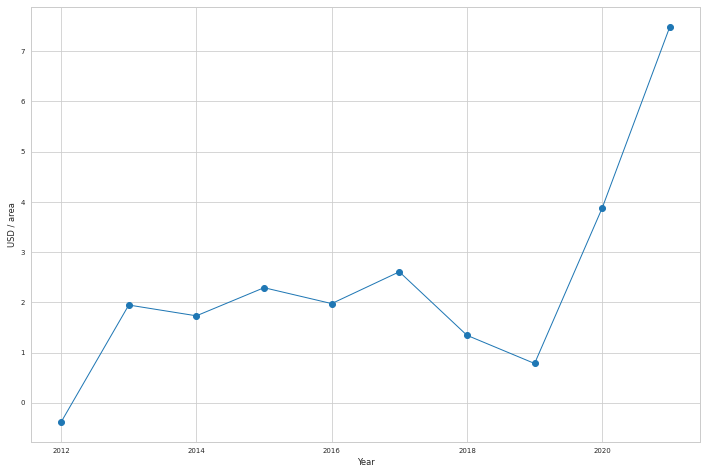

In [61]:
fig = plt.figure(figsize=(12,8))
plt.plot(years, list_price,'o-')
plt.xlabel('Year')
plt.ylabel('USD / area')